<a href="https://colab.research.google.com/github/Prashanth1234545/CODSOFT/blob/main/CODSOFT_TASK_1_TITANIC_SURVIVAL_PREDICTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Load and Explore the Data**

In [ ]:
import pandas as pd
import seaborn as sns

# Load the dataset using pandas
titanic = pd.read_csv('/Titanic-Dataset.csv')

# Display the first few rows of the dataset
print(titanic.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [ ]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
import pandas as pd
import seaborn as sns

titanic = sns.load_dataset('titanic')

print(titanic.columns)

columns_to_drop = ['deck', 'embark_town', 'alive']
existing_columns_to_drop = [col for col in columns_to_drop if col in titanic.columns]
titanic = titanic.drop(existing_columns_to_drop, axis=1)

if 'age' in titanic.columns:
    titanic['age'].fillna(titanic['age'].median(), inplace=True)

if 'embarked' in titanic.columns:
    titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

titanic = pd.get_dummies(titanic, columns=['sex', 'embarked', 'pclass'], drop_first=True)

# Check the processed DataFrame
print(titanic.head())


Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')
   survived   age  sibsp  parch     fare  class    who  adult_male  alone  \
0         0  22.0      1      0   7.2500  Third    man        True  False   
1         1  38.0      1      0  71.2833  First  woman       False  False   
2         1  26.0      0      0   7.9250  Third  woman       False   True   
3         1  35.0      1      0  53.1000  First  woman       False  False   
4         0  35.0      0      0   8.0500  Third    man        True   True   

   sex_male  embarked_Q  embarked_S  pclass_2  pclass_3  
0      True       False        True     False      True  
1     False       False       False     False     False  
2     False       False        True     False      True  
3     False       False        True     False     False  
4      True       False        True     False      True  


**Preprocessing**

In [22]:
def preprocess_data(df):
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
    df['Fare'].fillna(df['Fare'].median(), inplace=True)

    df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
    df['Embarked'] = df['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

    df.drop(['Name', 'Ticket', 'Cabin', 'PassengerId'], axis=1, inplace=True)
    return df

from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(titanic, test_size=0.2, random_state=42)

train_df = preprocess_data(train_df)
test_df = preprocess_data(test_df)


**Feature Selection**

In [10]:
X_train = train_df.drop('Survived', axis=1)
y_train = train_df['Survived']
X_test = test_df.drop('Survived', axis=1) # Drop 'Survived' from X_test

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [12]:
print(X_train_scaled)

[[-1.61413602 -0.7243102   1.25364106 ... -0.47934164 -0.07868358
   0.5635246 ]
 [-0.40055118 -0.7243102  -0.47728355 ... -0.47934164 -0.37714494
   0.5635246 ]
 [ 0.81303367 -0.7243102   0.21508629 ... -0.47934164 -0.47486697
   0.5635246 ]
 ...
 [ 0.81303367 -0.7243102   0.90745614 ... -0.47934164 -0.35580399
   0.5635246 ]
 [-1.61413602  1.38062393 -1.1696534  ...  2.04874166  1.68320121
   0.5635246 ]
 [-1.61413602 -0.7243102  -0.63114352 ...  0.78470001  0.86074761
   0.5635246 ]]


In [13]:
print(X_train)

     Pclass  Sex   Age  SibSp  Parch      Fare  Embarked
331       1    0  45.5      0      0   28.5000         2
733       2    0  23.0      0      0   13.0000         2
382       3    0  32.0      0      0    7.9250         2
704       3    0  26.0      1      0    7.8542         2
813       3    1   6.0      4      2   31.2750         2
..      ...  ...   ...    ...    ...       ...       ...
106       3    1  21.0      0      0    7.6500         2
270       1    0  28.0      0      0   31.0000         2
860       3    0  41.0      2      0   14.1083         2
435       1    1  14.0      1      2  120.0000         2
102       1    0  21.0      0      1   77.2875         2

[712 rows x 7 columns]


In [14]:
print(X_test)

     Pclass  Sex   Age  SibSp  Parch     Fare  Embarked
709       3    0  29.0      1      1  15.2458         0
439       2    0  31.0      0      0  10.5000         2
840       3    0  20.0      0      0   7.9250         2
720       2    1   6.0      0      1  33.0000         2
39        3    1  14.0      1      0  11.2417         0
..      ...  ...   ...    ...    ...      ...       ...
433       3    0  17.0      0      0   7.1250         2
773       3    0  29.0      0      0   7.2250         0
25        3    1  38.0      1      5  31.3875         2
84        2    1  17.0      0      0  10.5000         2
10        3    1   4.0      1      1  16.7000         2

[179 rows x 7 columns]


**MODEL TRAINING**

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Split training data into training and validation sets
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(X_train_scaled, y_train, test_size=0.2, random_state=42)

# Initialize and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_split, y_train_split)

# Make predictions
y_pred = model.predict(X_val_split)

# Evaluate the model
print("Accuracy:", accuracy_score(y_val_split, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_val_split, y_pred))
print("Classification Report:\n", classification_report(y_val_split, y_pred))


Accuracy: 0.8041958041958042
Confusion Matrix:
 [[72 15]
 [13 43]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84        87
           1       0.74      0.77      0.75        56

    accuracy                           0.80       143
   macro avg       0.79      0.80      0.80       143
weighted avg       0.81      0.80      0.80       143



**MAKE PREDICTION**



In [15]:
test_predictions = model.predict(X_test_scaled)

submission_df = pd.DataFrame({'PassengerId': test_df.index + 892, 'Survived': test_predictions})
submission_df.to_csv('submission.csv', index=False)


In [18]:
print(submission_df)

     PassengerId  Survived
0           1601         0
1           1331         0
2           1732         0
3           1612         1
4            931         1
..           ...       ...
174         1325         0
175         1665         0
176          917         0
177          976         1
178          902         1

[179 rows x 2 columns]


In [19]:
print(submission_df.head())

   PassengerId  Survived
0         1601         0
1         1331         0
2         1732         0
3         1612         1
4          931         1


In [20]:
print(submission_df.to_csv)

<bound method NDFrame.to_csv of      PassengerId  Survived
0           1601         0
1           1331         0
2           1732         0
3           1612         1
4            931         1
..           ...       ...
174         1325         0
175         1665         0
176          917         0
177          976         1
178          902         1

[179 rows x 2 columns]>


 **Visualize Results**

<ipython-input-23-2a59925d2c8c>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_df, x='Survived', palette='viridis')


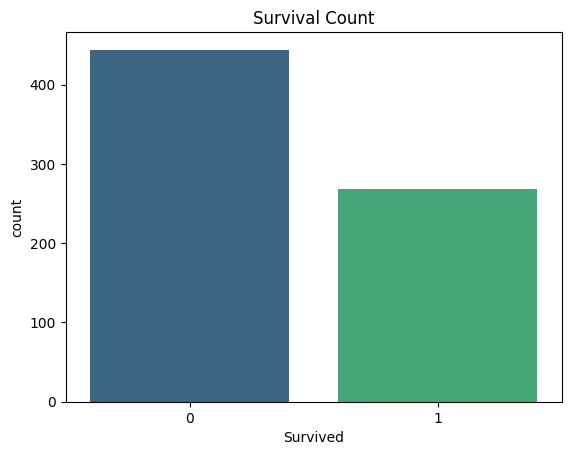

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(data=train_df, x='Survived', palette='viridis')
plt.title('Survival Count')
plt.show()
